#### Importing Libraries

In [137]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
%matplotlib inline
import os
print(os.listdir("../input/pictures/pictures"))

['IMG_20181125_215517.jpg', 'IMG_20180920_121044.jpg', 'IMG_20190127_202730.jpg', 'IMG_20190221_073415.jpg', 'picnic.jpg', 'IMG_20190221_073404.jpg', 'bishnu image.jpg', 'IMG_20180813_161751.jpg', 'IMG_20180804_154209.jpg']


The type of this input is <class 'numpy.ndarray'>
Shape: (313, 549, 3)


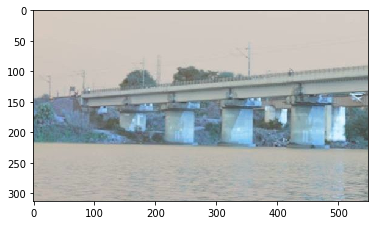

In [138]:
image = cv2.imread('../input/pictures/pictures/picnic.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

#### Since it is different in color from original image. So, convert this to RGB

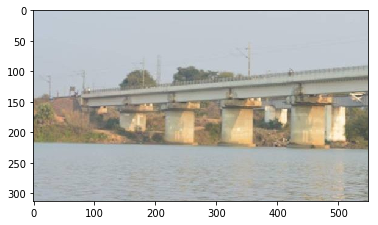

In [139]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

#### Resize if neeeded

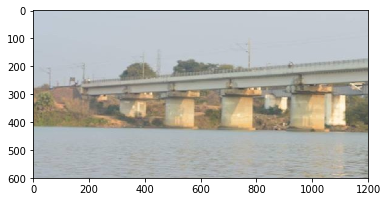

In [140]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

### Color Identification

In [141]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [142]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ## removing white color
    lower = np.array([0,0,0])
    upper = np.array([1,1,1])
    mask = cv2.inRange(image, lower, upper)
    image = cv2.bitwise_not(image,image, mask= mask)
    ## removing grey color
    lower = np.array([126,126,126])
    upper = np.array([128,128,128])
    mask = cv2.inRange(image, lower, upper)
    image = cv2.bitwise_not(image,image, mask= mask)
    ## removing black color
    lower = np.array([254,254,254])
    upper = np.array([255,255,255])
    mask = cv2.inRange(image, lower, upper)
    image = cv2.bitwise_not(image,image, mask= mask)
    plt.imshow(image)
    return image

In [143]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get the colors ordered by iterating through keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

#### Here we see the top 5 dominant colors in an image :-

[array([194.47990337, 201.50971081, 208.90939343]),
 array([156.57338421, 144.75660207, 125.27211567]),
 array([174.82643934, 179.20592063, 177.69361556]),
 array([219.29577587, 189.42206609, 142.97779513]),
 array([121.53340757, 114.89623406,  96.81146656])]

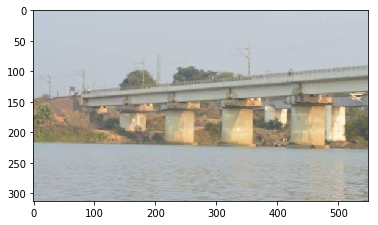

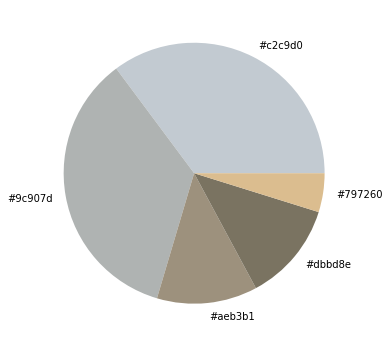

In [144]:
## image picnic.jpg
get_colors(get_image('../input/pictures/pictures/picnic.jpg'), 5, True)

[array([148.34240315, 136.93022678, 123.76326055]),
 array([6.6332737 , 6.78566637, 7.07412791]),
 array([63.11242253, 68.00250679, 63.67338625]),
 array([106.95305065, 117.94427685,  85.89354606]),
 array([192.45780753, 186.03527927, 185.5253484 ])]

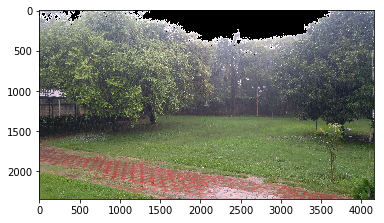

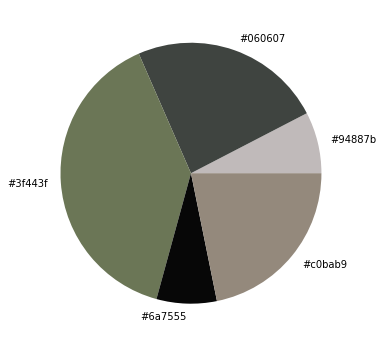

In [145]:
## image IMG_20190221_073404.jpg
get_colors(get_image('../input/pictures/pictures/IMG_20180920_121044.jpg'), 5, True)

### Search images using color

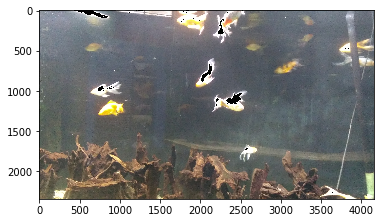

In [146]:
IMAGE_DIRECTORY = '../input/pictures/pictures'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED': [128, 0, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

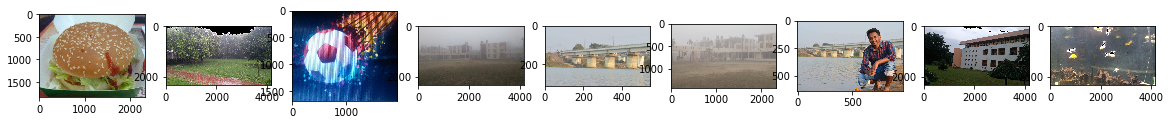

In [147]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [148]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10):
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [149]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

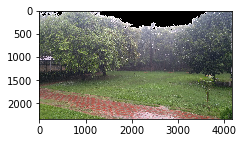

In [150]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

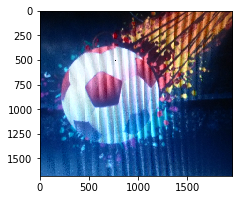

In [152]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)